In [1]:
#MNIST Handwritten Digit Predictor
#Modular implementation for predicting handwritten digits

In [2]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def load_and_preprocess_data():
    """Load and preprocess MNIST data."""
    print("Loading data...")
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    
    # Normalize pixel values to 0-1
    x_train = x_train / 255.0
    x_test = x_test / 255.0
    
    print(f"Training samples: {len(x_train)}")
    print(f"Test samples: {len(x_test)}")
    
    return (x_train, y_train), (x_test, y_test)

In [4]:
def create_model():
    """Create and return the neural network model."""
    print("Creating model...")
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),  # 28x28 -> 784
        tf.keras.layers.Dense(128, activation='relu'),   # Hidden layer
        tf.keras.layers.Dense(10, activation='softmax')  # Output (10 digits)
    ])
    return model


In [5]:
def compile_model(model):
    """Compile the model with optimizer, loss, and metrics."""
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


In [6]:
def train_model(model, x_train, y_train, epochs=3):
    """Train the model on training data."""
    print("Training model...")
    history = model.fit(x_train, y_train, epochs=epochs, verbose=1)
    return history

In [7]:
def evaluate_model(model, x_test, y_test):
    """Evaluate model performance on test data."""
    print("Testing model...")
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f"Test accuracy: {test_accuracy:.4f} ({test_accuracy*100:.1f}%)")
    return test_loss, test_accuracy

In [8]:
def make_prediction(model, image):
    """Make a prediction on a single image."""
    if len(image.shape) == 2:  
        image = image.reshape(1, 28, 28)
    
    prediction = model.predict(image, verbose=0)[0]
    predicted_label = np.argmax(prediction)
    confidence = prediction[predicted_label]
    
    return predicted_label, confidence, prediction

In [9]:
def select_random_samples(data_length, num_samples=5):
    """Select random indices for prediction testing."""
    return np.random.choice(data_length, min(num_samples, data_length), replace=False)



In [10]:
def format_prediction_result(i, true_label, predicted_label, confidence):
    """Format prediction result for display."""
    status = '✓' if true_label == predicted_label else '✗'
    return (f"{i+1}. True: {true_label}, Predicted: {predicted_label}, "
           f"Confidence: {confidence:.3f} {status}")

In [11]:
def test_random_predictions(model, x_test, y_test, num_samples=5):
    """Test model on random samples and display results."""
    print(f"\nMaking predictions on {num_samples} random samples:")
    indices = select_random_samples(len(x_test), num_samples)
    
    results = []
    for i, idx in enumerate(indices):
        # Get image and true label
        image = x_test[idx]
        true_label = y_test[idx]
        
        # Make prediction
        predicted_label, confidence, _ = make_prediction(model, image)
        
        # Format and display result
        result = format_prediction_result(i, true_label, predicted_label, confidence)
        print(result)
        results.append({
            'index': idx,
            'true_label': true_label,
            'predicted_label': predicted_label,
            'confidence': confidence,
            'correct': true_label == predicted_label
        })
    
    return results, indices

In [12]:
def visualize_prediction(model, x_test, y_test, sample_index):
    """Visualize a prediction with image and probability distribution."""
    print(f"\nShowing detailed prediction for sample {sample_index}:")
    
    plt.figure(figsize=(8, 3))
    
    # Show image
    plt.subplot(1, 2, 1)
    plt.imshow(x_test[sample_index], cmap='gray')
    
    predicted_label, _, _ = make_prediction(model, x_test[sample_index])
    plt.title(f'True: {y_test[sample_index]}, Pred: {predicted_label}')
    plt.axis('off')
    
    # Show probabilities
    plt.subplot(1, 2, 2)
    _, _, probs = make_prediction(model, x_test[sample_index])
    plt.bar(range(10), probs)
    plt.xlabel('Digit')
    plt.ylabel('Probability')
    plt.title('Predictions')
    
    plt.tight_layout()
    plt.show()


In [13]:
def normalize_data(x_data):
    """Normalize data to 0-1 range."""
    return x_data / 255.0


In [14]:
def is_high_confidence(confidence, threshold=0.8):
    """Check if prediction confidence is above threshold."""
    return confidence >= threshold



In [15]:
def main():
    """Main function - orchestrates the entire pipeline."""
    print("Basic MNIST Digit Predictor")
    print("=" * 40)
    
    # Load and preprocess data
    (x_train, y_train), (x_test, y_test) = load_and_preprocess_data()
    
    # Create and compile model
    model = create_model()
    model = compile_model(model)
    
    # Train model
    train_model(model, x_train, y_train, epochs=3)
    
    # Evaluate model
    evaluate_model(model, x_test, y_test)
    
    # Test on random samples
    results, indices = test_random_predictions(model, x_test, y_test, num_samples=5)
    
    # Visualize one prediction
    visualize_prediction(model, x_test, y_test, indices[0])
    
    print("\nDone! Model can predict handwritten digits.")
    
    return model, results

Basic MNIST Digit Predictor
Loading data...
Training samples: 60000
Test samples: 10000
Creating model...
Training model...


c:\Users\laksh\Documents\Genai_learnings\My_projects\my-tf-env\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8750 - loss: 0.4377
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9639 - loss: 0.1215
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9771 - loss: 0.0778
Testing model...
Test accuracy: 0.9721 (97.2%)

Making predictions on 5 random samples:
1. True: 1, Predicted: 1, Confidence: 0.971 ✓
2. True: 5, Predicted: 5, Confidence: 1.000 ✓
3. True: 0, Predicted: 0, Confidence: 1.000 ✓
4. True: 0, Predicted: 0, Confidence: 1.000 ✓
5. True: 3, Predicted: 3, Confidence: 1.000 ✓

Showing detailed prediction for sample 2266:


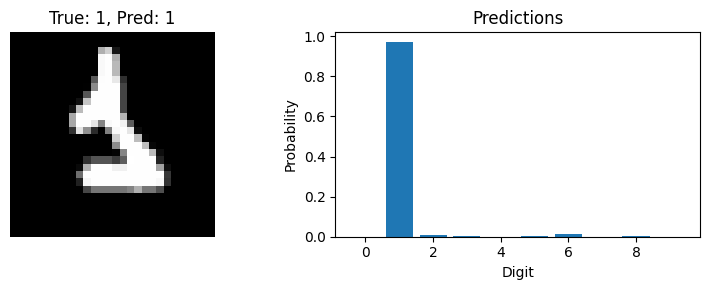


Done! Model can predict handwritten digits.


(<Sequential name=sequential, built=True>,
 [{'index': np.int32(2266),
   'true_label': np.uint8(1),
   'predicted_label': np.int64(1),
   'confidence': np.float32(0.97140807),
   'correct': np.True_},
  {'index': np.int32(2727),
   'true_label': np.uint8(5),
   'predicted_label': np.int64(5),
   'confidence': np.float32(0.9999639),
   'correct': np.True_},
  {'index': np.int32(2492),
   'true_label': np.uint8(0),
   'predicted_label': np.int64(0),
   'confidence': np.float32(0.9999691),
   'correct': np.True_},
  {'index': np.int32(7617),
   'true_label': np.uint8(0),
   'predicted_label': np.int64(0),
   'confidence': np.float32(0.99996865),
   'correct': np.True_},
  {'index': np.int32(382),
   'true_label': np.uint8(3),
   'predicted_label': np.int64(3),
   'confidence': np.float32(0.9999068),
   'correct': np.True_}])

In [16]:
# Function call
main()